In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
   
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [17]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import pandas as pd

from neurolib.models.wc import WCModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

# a nice color map
plt.rcParams['image.cmap'] = 'magma'
#plasma

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches



import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [3]:
#process data
def process_data (parameters_array):
    parameter_1 = []
    parameter_2 = []
    for i in range(len(parameters_array)):
        #print(i)
        parameter_1.append(parameters_array[i][0])
        parameter_2.append(parameters_array[i][1])
    return parameter_1, parameter_2

In [4]:
#path to results
directory = "/Users/pamirozsuna/Desktop/pamir_ma/results/Exploration_SCZ/"
gbc = np.load(directory + "gbc.npy")
parameters = np.load(directory + "parameters.npy")


In [5]:
def process_data (parameters_array):
    parameter_1 = []
    parameter_2 = []
    parameter_3 = []
    parameter_4 = []
    for i in range(len(parameters_array)):
        #print(i)
        parameter_1.append(parameters_array[i][0])
        parameter_2.append(parameters_array[i][1])
        parameter_3.append(parameters_array[i][2])
        parameter_4.append(parameters_array[i][3])
    return parameter_1, parameter_2, parameter_3, parameter_4

In [6]:
exc_ext, c_ei, c_ie, c_ii = process_data(parameters)

In [7]:
gbc_filtered = []
exc_ext_filtered = []
c_ei_filtered = []
c_ie_filtered = []
c_ii_filtered = []
for i in range(len(gbc)):
    if gbc[i] < 0.6:
        gbc_filtered.append(gbc[i])
        exc_ext_filtered.append(exc_ext[i])
        c_ei_filtered.append(c_ei[i])
        c_ie_filtered.append(c_ie[i])
        c_ii_filtered.append(c_ii[i])
    

In [8]:
dataframe = pd.DataFrame({'exc_ext':exc_ext_filtered,'c_ei': c_ei_filtered, 'c_ie': c_ie_filtered, 'c_ii':c_ii_filtered, 'gbc':gbc_filtered}) 
#pivot_table = dataframe.pivot_table(values='gbc', index = 'exc_ext', columns='c_excinh')
dataframe = pd.DataFrame({'exc_ext':exc_ext,'c_ei': c_ei, 'c_ie': c_ie, 'c_ii':c_ii, 'gbc':gbc}) 

In [9]:
dataframe

exc_ext       c_ei  c_ie  c_ii       gbc
0         0.5   8.000000   8.0   0.0  0.999995
1         0.5   8.333333   8.0   0.0  0.999996
2         0.5   8.666667   8.0   0.0  0.999995
3         0.5   9.000000   8.0   0.0  0.999996
4         0.5   9.333333   8.0   0.0  0.999995
...       ...        ...   ...   ...       ...
9995      1.0   9.666667  11.0   2.0  0.999996
9996      1.0  10.000000  11.0   2.0  0.999989
9997      1.0  10.333333  11.0   2.0  0.921194
9998      1.0  10.666667  11.0   2.0  0.791515
9999      1.0  11.000000  11.0   2.0  0.794142

[10000 rows x 5 columns]

In [10]:
pivot_table_dataframe00 = dataframe.pivot_table(values='gbc', index='c_ei', columns = 'exc_ext', aggfunc=min)
pivot_table_dataframe10 = dataframe.pivot_table(values='gbc', index='c_ie', columns = 'exc_ext', aggfunc=min)
pivot_table_dataframe20 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'exc_ext', aggfunc=min)

pivot_table_dataframe11 = dataframe.pivot_table(values='gbc', index='c_ie', columns = 'c_ei', aggfunc=min)
pivot_table_dataframe21 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'c_ei', aggfunc=min)

pivot_table_dataframe22 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'c_ie', aggfunc=min)

In [11]:
pivot_table_dataframe00

exc_ext    0.500000  0.555556  0.611111  0.666667  0.722222  0.777778  \
c_ei                                                                    
8.000000   0.435492  0.579619  0.769666  0.669708  0.772042  0.614470   
8.333333   0.445134  0.618462  0.410336  0.495647  0.696206  0.743061   
8.666667   0.455942  0.583116  0.619768  0.494911  0.761471  0.660811   
9.000000   0.483232  0.545961  0.537784  0.554710  0.617876  0.607916   
9.333333   0.297657  0.469079  0.519967  0.612210  0.710005  0.511810   
9.666667   0.301748  0.456591  0.553210  0.476050  0.481484  0.520224   
10.000000  0.226365  0.534906  0.560849  0.533197  0.634171  0.592635   
10.333333  0.364948  0.478600  0.486356  0.605986  0.421602  0.643964   
10.666667  0.344692  0.359824  0.515733  0.569077  0.498263  0.657824   
11.000000  0.347504  0.452591  0.449669  0.542973  0.368502  0.571225   

exc_ext    0.833333  0.888889  0.944444  1.000000  
c_ei                                               
8.000000   0.750900  0.983389  0.986558  0.999993  
8.333333   0.690019  0.776258  0.747670  0.757968  
8.666667   0.762847  0.615699  0.780329  0.599628  
9.000000   0.671108  0.733480  0.572230  0.630801  
9.333333   0.692095  0.637630  0.724913  0.671503  
9.666667   0.726416  0.726202  0.679439  0.712137  
10.000000  0.726306  0.671151  0.655253  0.696393  
10.333333  0.631249  0.636771  0.671076  0.588825  
10.666667  0.593704  0.599148  0.726037  0.666402  
11.000000  0.601696  0.651962  0.684782  0.773997

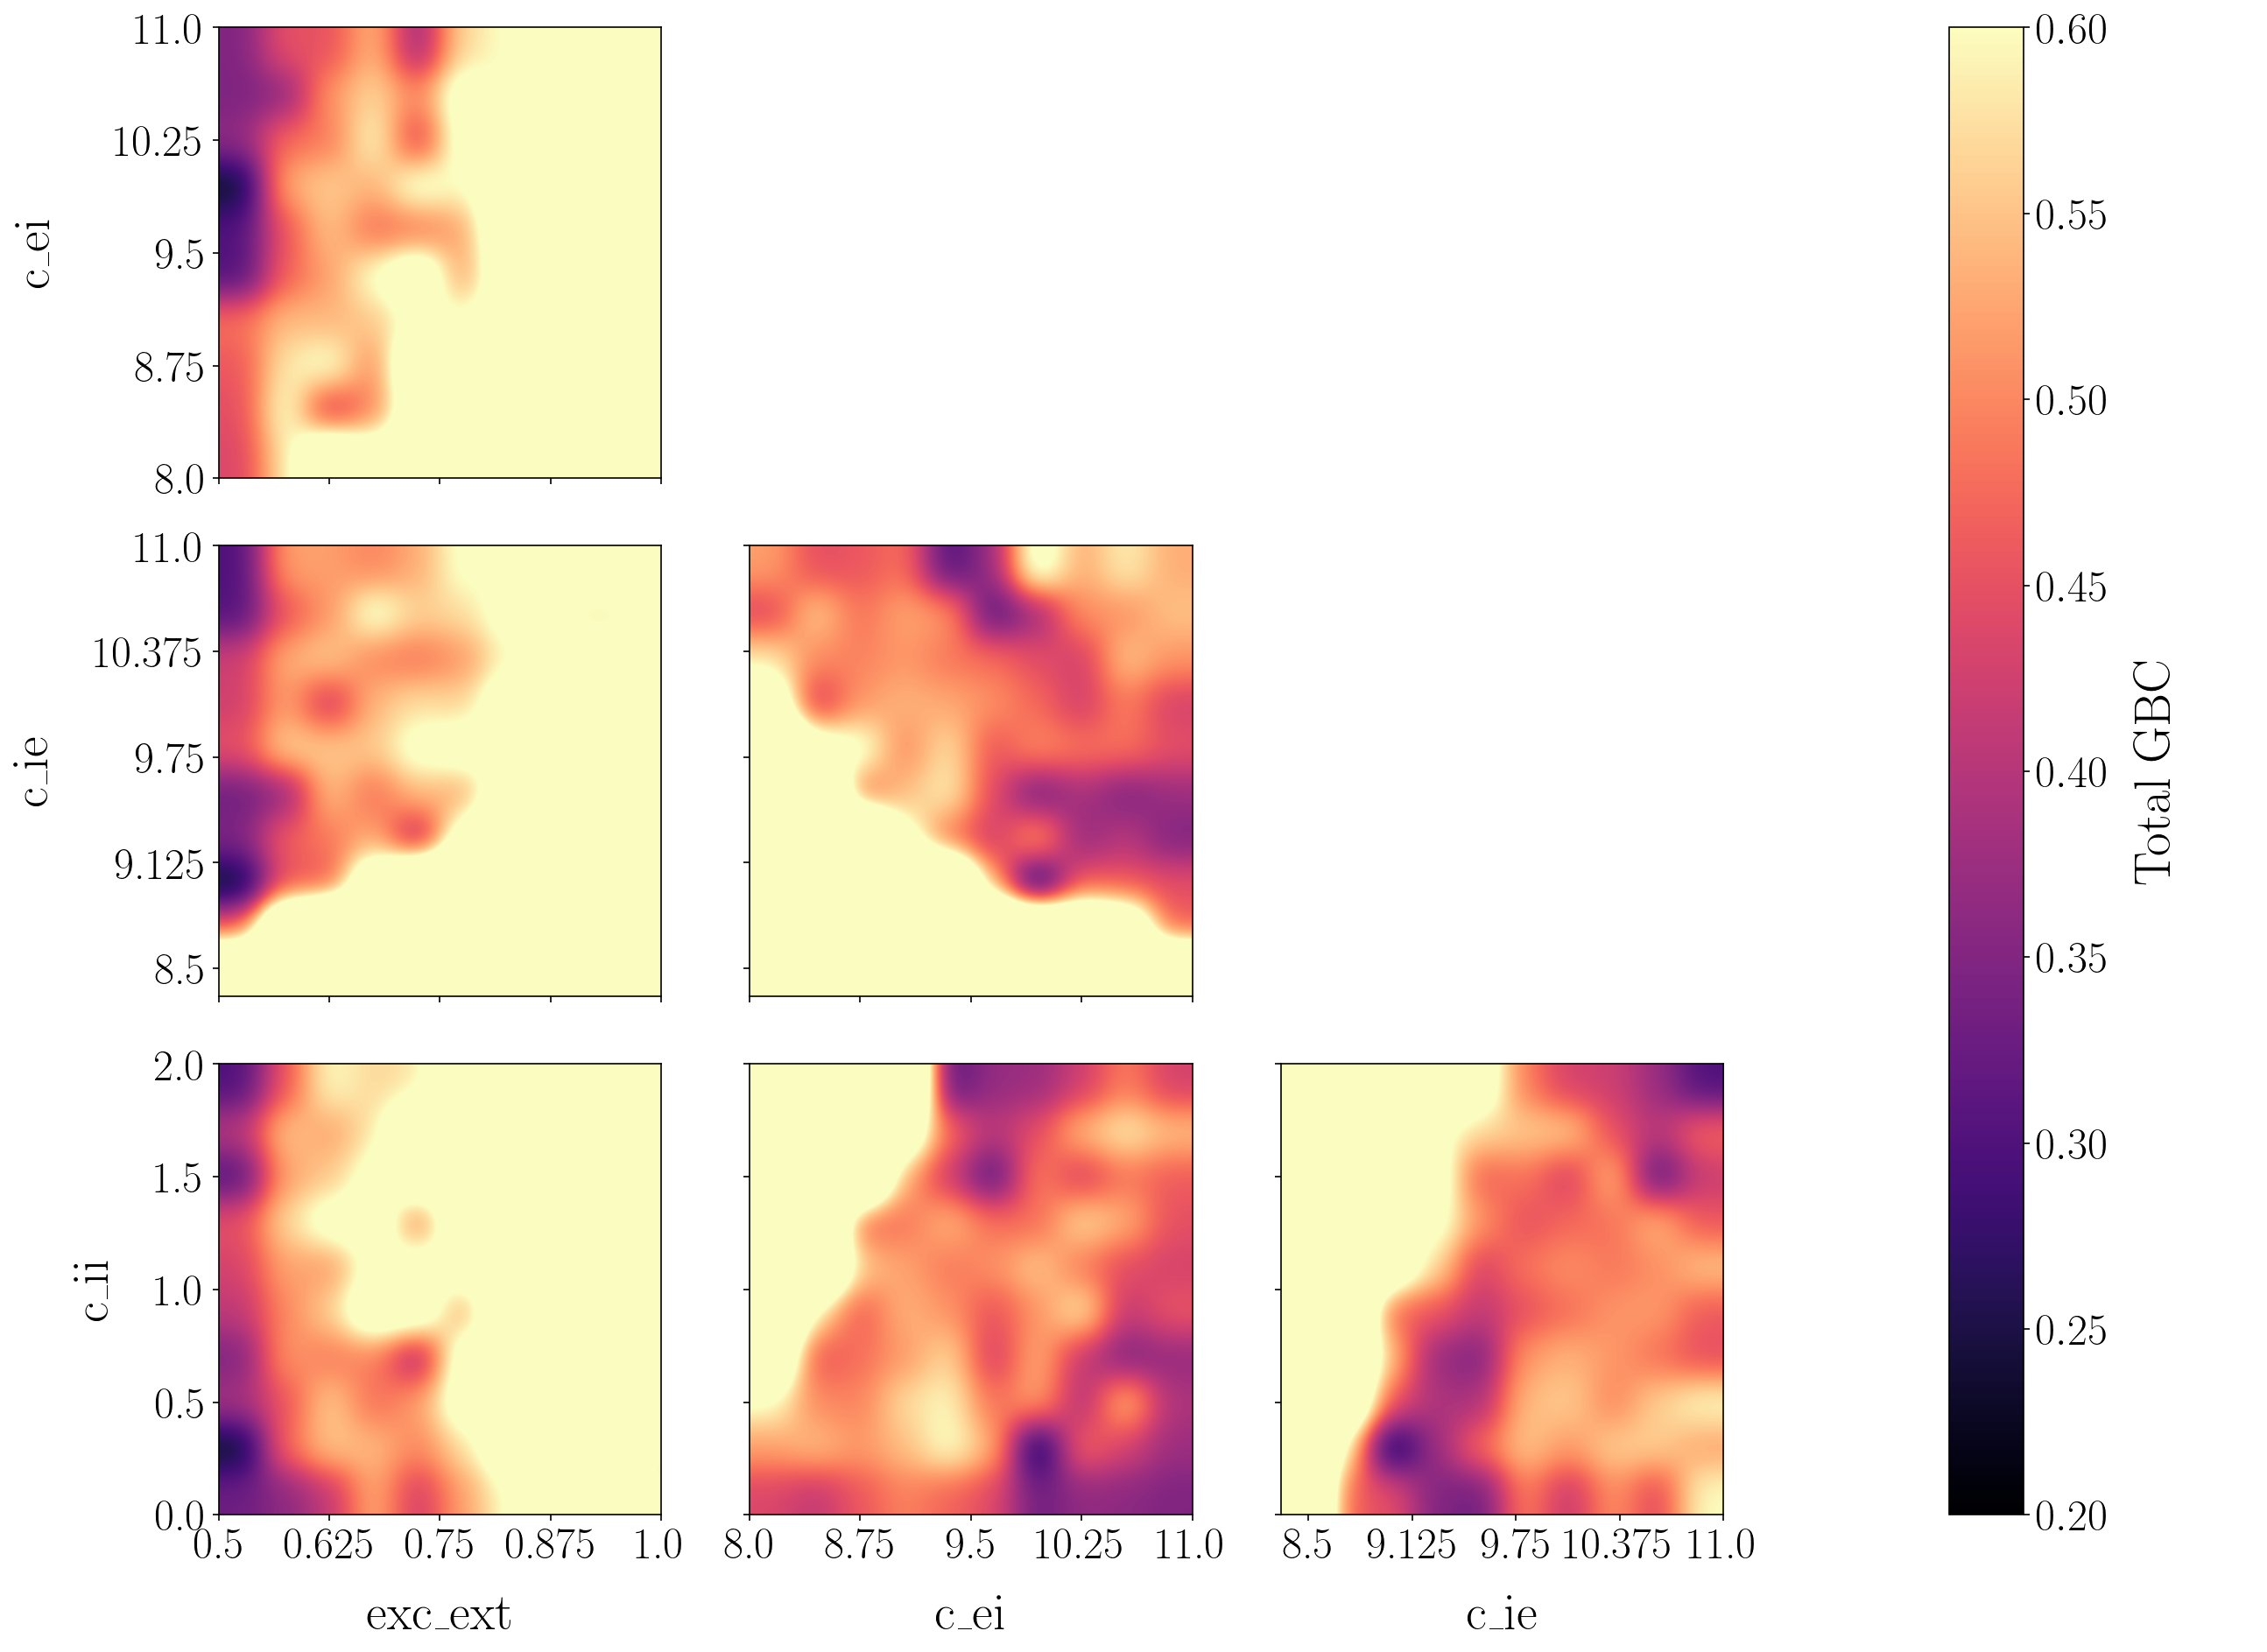

In [19]:
f, axarr = plt.subplots(3, 4, figsize=(20, 15))
f.set_facecolor('w') 

img =axarr[0, 0].imshow(pivot_table_dataframe00, vmin=0.2, vmax=0.6, aspect="auto", extent = [min(exc_ext), max(exc_ext), min(c_ei), max(c_ei)], origin='lower', interpolation='gaussian')
axarr[0, 0].set_xticks([0.5, 0.625, 0.75 , 0.875, 1. ])
axarr[0, 0].set_xticklabels([' ',  ' ', ' ', ' ', ' '])
axarr[0, 0].set_yticks([8.  ,  8.75,  9.5 , 10.25, 11.  ])
axarr[0, 0].set_yticklabels(['8.0', '8.75', '9.5', '10.25', '11.0'])
axarr[0, 0].set_ylabel('c_ei', size=28, labelpad = 30)

#axarr[0, 0].get_yticklabels()[4].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[0, 0].get_yticklabels()[4].set_weight("bold")
#axarr[0, 0].get_yticklabels()[4].set_position((-0.25, 10))
#axarr[0, 0].yaxis.get_major_ticks()[4].tick1line.set_markersize(50) 
#axarr[0, 0].yaxis.get_major_ticks()[4].tick1line.set_markeredgecolor("lightskyblue")
#axarr[0, 0].yaxis.get_major_ticks()[4].tick1line.set_markeredgewidth(2)


axarr[1, 0].imshow(pivot_table_dataframe10, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(exc_ext_filtered), max(exc_ext_filtered), min(c_ie_filtered), max(c_ie_filtered)], origin='lower',interpolation='gaussian')
axarr[1, 0].set_ylabel('c_ie', size=28, labelpad= 20)
axarr[1, 0].set_yticks([8.5  ,  9.125, 9.75, 10.375, 11.  ])
axarr[1, 0].set_yticklabels(['8.5', '9.125', '9.75', '10.375', '11.0'])
axarr[1, 0].set_xticks([0.5, 0.625, 0.75 , 0.875, 1. ])
axarr[1, 0].set_xticklabels([ ' ', ' ', ' ', ' ', ' '])

#axarr[1, 0].get_yticklabels()[2].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[1, 0].get_yticklabels()[2].set_weight("bold")
#axarr[1, 0].get_yticklabels()[2].set_position((-0.25, 0))
#axarr[1, 0].yaxis.get_major_ticks()[2].tick1line.set_markersize(50) 
#axarr[1, 0].yaxis.get_major_ticks()[2].tick1line.set_markeredgecolor("lightskyblue")
#axarr[1, 0].yaxis.get_major_ticks()[2].tick1line.set_markeredgewidth(2)


axarr[1, 1].imshow(pivot_table_dataframe11, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(c_ei_filtered), max(c_ei_filtered), min(c_ie_filtered), max(c_ie_filtered)], origin='lower',interpolation='gaussian')
axarr[1, 1].set_yticks([8.5  ,  9.125, 9.75, 10.375, 11.  ])
axarr[1, 1].set_yticklabels([' ',  ' ', ' ', ' ', ' '])
axarr[1, 1].set_xticks([8.  ,  8.75,  9.5 , 10.25, 11.  ])
axarr[1, 1].set_xticklabels([' ', ' ', ' ', ' ', ' '])

axarr[2, 0].imshow(pivot_table_dataframe20, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(exc_ext_filtered), max(exc_ext_filtered), min(c_ii_filtered), max(c_ii_filtered)], origin='lower',interpolation='gaussian')
axarr[2, 0].set_yticks([0. , 0.5, 1. , 1.5, 2. ])
axarr[2, 0].set_yticklabels(['0.0', '0.5', '1.0', '1.5', '2.0'])
axarr[2, 0].set_ylabel('c_ii', size=28, labelpad= 20)
axarr[2, 0].set_xlabel('exc_ext', size=28, labelpad= 15)
axarr[2, 0].set_xticks([0.5, 0.625, 0.75 , 0.875, 1. ])
axarr[2, 0].set_xticklabels(['0.5', '0.625', '0.75', '0.875', '1.0'])

#axarr[2, 0].get_yticklabels()[0].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[2, 0].get_yticklabels()[0].set_weight("bold")
#axarr[2, 0].get_yticklabels()[0].set_position((-0.25, -10))
#axarr[2, 0].yaxis.get_major_ticks()[0].tick1line.set_markersize(50) 
#axarr[2, 0].yaxis.get_major_ticks()[0].tick1line.set_markeredgecolor("lightskyblue")
#axarr[2, 0].yaxis.get_major_ticks()[0].tick1line.set_markeredgewidth(2)

#axarr[2, 0].get_xticklabels()[0].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[2, 0].get_xticklabels()[0].set_weight("bold")
#axarr[2, 0].get_xticklabels()[0].set_position((10, -0.25))
#axarr[2, 0].xaxis.get_major_ticks()[0].tick1line.set_markersize(50) 
#axarr[2, 0].xaxis.get_major_ticks()[0].tick1line.set_markeredgecolor("lightskyblue")
#axarr[2, 0].xaxis.get_major_ticks()[0].tick1line.set_markeredgewidth(2)

axarr[2, 1].imshow(pivot_table_dataframe21, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(c_ei_filtered), max(c_ei_filtered), min(c_ii_filtered), max(c_ii_filtered)], origin='lower',interpolation='gaussian')
axarr[2, 1].set_xticks([8.  ,  8.75,  9.5 , 10.25, 11.  ])
axarr[2, 1].set_xticklabels(['8.0', '8.75', '9.5', '10.25','11.0'])
axarr[2, 1].set_yticks([0. , 0.5, 1. , 1.5, 2. ])
axarr[2, 1].set_yticklabels([' ', ' ', ' ', ' ', ' '])
axarr[2, 1].set_xlabel('c_ei', size=28, labelpad= 15)

#axarr[2, 1].get_xticklabels()[4].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[2, 1].get_xticklabels()[4].set_weight("bold")
#axarr[2, 1].get_xticklabels()[4].set_position((0, -0.25))
#axarr[2, 1].xaxis.get_major_ticks()[4].tick1line.set_markersize(50) 
#axarr[2, 1].xaxis.get_major_ticks()[4].tick1line.set_markeredgecolor("lightskyblue")
#axarr[2, 1].xaxis.get_major_ticks()[4].tick1line.set_markeredgewidth(2)

axarr[2, 2].imshow(pivot_table_dataframe22, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(c_ie_filtered), max(c_ie_filtered), min(c_ii_filtered), max(c_ii_filtered)], origin='lower',interpolation='gaussian')
axarr[2, 2].set_xticks([8.5  ,  9.125, 9.75, 10.375, 11.  ])
axarr[2, 2].set_xticklabels(['8.5', '9.125', '9.75', '10.375', '11.0'])
axarr[2, 2].set_yticks([0. , 0.5, 1. , 1.5, 2. ])
axarr[2, 2].set_yticklabels([' ', ' ', ' ', ' ', ' '])
axarr[2, 2].set_xlabel('c_ie', size=28, labelpad= 15)

#axarr[2, 2].get_xticklabels()[2].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
#axarr[2, 2].get_xticklabels()[2].set_weight("bold")
#axarr[2, 2].get_xticklabels()[2].set_position((-10, -0.25))
#axarr[2, 2].xaxis.get_major_ticks()[2].tick1line.set_markersize(50) 
#axarr[2, 2].xaxis.get_major_ticks()[2].tick1line.set_markeredgecolor("lightskyblue")
#axarr[2, 2].xaxis.get_major_ticks()[2].tick1line.set_markeredgewidth(2)

#ax = f.add_subplot()
#ax.text(0, 0, 'boxed italics text in data coords', style='italic',
#        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

#axarr.annotate('Peak', xy=(2, 8), xytext=(4, 10), fontsize=12,
#            arrowprops=dict(facecolor='green', shrink=0.05))

#plt.text(-1, 2.35, 'Default parameters:\n\n exc_ext = 0.45 \n c_ei = 10.33 \n c_ie = 9.67 \n c_ii = 2.0 \n\n K_gl = 1.84 \n sigma_ou = $4.28 \cdot 10^{-5}$', fontsize = 22, 
#         bbox = dict(facecolor = 'lightskyblue', alpha = 0.5))

axarr[0,1].axis('off')
axarr[0,1].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
axarr[0,2].axis('off')
axarr[0,2].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
axarr[0,3].axis('off')
axarr[0,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[0,4].axis('off')
#axarr[0,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
axarr[1,2].axis('off')
axarr[1,2].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
axarr[1,3].axis('off')
axarr[1,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[1,4].axis('off')
#axarr[1,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
axarr[2,3].axis('off')
axarr[2,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[2,4].axis('off')
#axarr[2,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[3,4].axis('off')
#axarr[3,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[0,5].axis('off')
#axarr[0,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[1,5].axis('off')
#axarr[1,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[2,5].axis('off')
#axarr[2,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[3,5].axis('off')
#axarr[3,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
#axarr[4,5].axis('off')
#axarr[4,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')

#plt.rcParams.update({'font.size': 24})
cbar = plt.colorbar(img, ax=axarr[:, :], orientation = "vertical")
cbar.ax.set_ylabel('Total GBC', fontsize = 28, labelpad =15)
cbar.ax.tick_params(labelsize=24) 
f.subplots_adjust(wspace=0.2)
f.subplots_adjust(hspace=0.15)


f.savefig('exploration_5d.png',bbox_inches='tight')

In [99]:
b = np.where(gbc<=0.226365)
print(b)

print(gbc[126])
print(exc_ext[126])
print(c_excinh[126])
print(c_inhexc[126])
print(c_inhinh[126])
print(parameters[126][4])
print(parameters[126][5])

(array([126]),)
0.22636499151648096
0.5
10.0
8.666666666666666
0.2222222222222222
1.84
4.28e-05


In [71]:
indices_1 = []
indices_2 = []
indices_3 = []
indices_4 = []
indices_5 = []
indices_6 = []
indices_7 = []
indices_8 = []
indices_9 = []
indices_10 = []
gbc_s_1 = []
gbc_s_2 = []
gbc_s_3 = []
gbc_s_4 = []
gbc_s_5 = []
gbc_s_6 = []
gbc_s_7 = []
gbc_s_8 = []
gbc_s_9 = []
gbc_s_10 = []

for i in range(len(gbc)):
    if 0 <= gbc[i] and gbc[i] < 0.1:
        indices_1.append(i)
        gbc_s.append(gbc[i])
    elif 0.1 <= gbc[i] and gbc[i] < 0.2:
        indices_2.append(i)
        gbc_s_2.append(gbc[i])
    elif 0.2 <= gbc[i] and gbc[i] < 0.3:
        indices_3.append(i)
        gbc_s_3.append(gbc[i])
    elif 0.3 <= gbc[i] and gbc[i] < 0.4:
        indices_4.append(i)
        gbc_s_4.append(gbc[i])
    elif 0.4 <= gbc[i] and gbc[i] < 0.5:
        indices_5.append(i)
        gbc_s_5.append(gbc[i])
    elif 0.5 <= gbc[i] and gbc[i] < 0.6:
        indices_6.append(i)
        gbc_s_6.append(gbc[i])
    elif 0.6 <= gbc[i] and gbc[i] < 0.7:
        indices_7.append(i)
        gbc_s_7.append(gbc[i])
    elif 0.7 <= gbc[i] and gbc[i] < 0.8:
        indices_8.append(i)
        gbc_s_8.append(gbc[i])
    elif 0.8 <= gbc[i] and gbc[i] < 0.9:
        indices_9.append(i)
        gbc_s_9.append(gbc[i])
    elif 0.9 <= gbc[i] and gbc[i] < 1:
        indices_10.append(i)
        gbc_s_10.append(gbc[i])

In [33]:
exc_ext_1 = []
c_excinh_1 = []
c_inhexc_1 = []
c_inhinh_1 = []

exc_ext_2 = []
c_excinh_2 = []
c_inhexc_2 = []
c_inhinh_2 = []

exc_ext_3 = []
c_excinh_3 = []
c_inhexc_3 = []
c_inhinh_3 = []

exc_ext_4 = []
c_excinh_4 = []
c_inhexc_4 = []
c_inhinh_4 = []

exc_ext_5 = []
c_excinh_5 = []
c_inhexc_5 = []
c_inhinh_5 = []

exc_ext_6 = []
c_excinh_6 = []
c_inhexc_6 = []
c_inhinh_6 = []

exc_ext_7 = []
c_excinh_7 = []
c_inhexc_7 = []
c_inhinh_7 = []

exc_ext_8 = []
c_excinh_8 = []
c_inhexc_8 = []
c_inhinh_8 = []

exc_ext_9 = []
c_excinh_9 = []
c_inhexc_9 = []
c_inhinh_9 = []

exc_ext_10 = []
c_excinh_10 = []
c_inhexc_10 = []
c_inhinh_10 = []


for index_1 in indices_1:
    exc_ext_1.append(exc_ext[index_1])
    c_excinh_1.append(c_excinh[index_1])
    c_inhexc_1.append(c_inhexc[index_1])
    c_inhinh_1.append(c_inhinh[index_1])

    
for index_2 in indices_2:
    exc_ext_2.append(exc_ext[index_2])
    c_excinh_2.append(c_excinh[index_2])
    c_inhexc_2.append(c_inhexc[index_2])
    c_inhinh_2.append(c_inhinh[index_2])

for index_3 in indices_3:
    exc_ext_3.append(exc_ext[index_3])
    c_excinh_3.append(c_excinh[index_3])
    c_inhexc_3.append(c_inhexc[index_3])
    c_inhinh_3.append(c_inhinh[index_3])

for index_4 in indices_4:
    exc_ext_4.append(exc_ext[index_4])
    c_excinh_4.append(c_excinh[index_4])
    c_inhexc_4.append(c_inhexc[index_4])
    c_inhinh_4.append(c_inhinh[index_4])

for index_5 in indices_5:
    exc_ext_5.append(exc_ext[index_5])
    c_excinh_5.append(c_excinh[index_5])
    c_inhexc_5.append(c_inhexc[index_5])
    c_inhinh_5.append(c_inhinh[index_5])

for index_6 in indices_6:
    exc_ext_6.append(exc_ext[index_6])
    c_excinh_6.append(c_excinh[index_6])
    c_inhexc_6.append(c_inhexc[index_6])
    c_inhinh_6.append(c_inhinh[index_6])

for index_7 in indices_7:
    exc_ext_7.append(exc_ext[index_7])
    c_excinh_7.append(c_excinh[index_7])
    c_inhexc_7.append(c_inhexc[index_7])
    c_inhinh_7.append(c_inhinh[index_7])

for index_8 in indices_8:
    exc_ext_8.append(exc_ext[index_8])
    c_excinh_8.append(c_excinh[index_8])
    c_inhexc_8.append(c_inhexc[index_8])
    c_inhinh_8.append(c_inhinh[index_8])

for index_9 in indices_9:
    exc_ext_9.append(exc_ext[index_9])
    c_excinh_9.append(c_excinh[index_9])
    c_inhexc_9.append(c_inhexc[index_9])
    c_inhinh_9.append(c_inhinh[index_9])

for index_10 in indices_10:
    exc_ext_10.append(exc_ext[index_10])
    c_excinh_10.append(c_excinh[index_10])
    c_inhexc_10.append(c_inhexc[index_10])
    c_inhinh_10.append(c_inhinh[index_10])



In [34]:
dataframe3 = pd.DataFrame({'gbc':gbc_s_3,'c_excinh': c_excinh_3, 'c_inhexc': c_inhexc_3, 'c_inhinh':c_inhinh_3, 'exc_ext':exc_ext_3})

In [35]:
dataframe4 = pd.DataFrame({'gbc':gbc_s_4,'c_excinh': c_excinh_4, 'c_inhexc': c_inhexc_4, 'c_inhinh':c_inhinh_4, 'exc_ext':exc_ext_4})

In [36]:
dataframe3

gbc   c_excinh   c_inhexc  c_inhinh  exc_ext
0  0.226365  10.000000   8.666667  0.222222      0.5
1  0.297657   9.333333  11.000000  2.000000      0.5

In [37]:
dataframe4

gbc   c_excinh   c_inhexc  c_inhinh   exc_ext
0   0.364948  10.333333   9.000000  0.000000  0.500000
1   0.347504  11.000000   9.000000  0.000000  0.500000
2   0.330260  10.000000   9.333333  0.000000  0.500000
3   0.374431  11.000000   9.333333  0.000000  0.500000
4   0.375467  11.000000   9.000000  0.222222  0.500000
5   0.392091  11.000000   9.000000  0.444444  0.500000
6   0.387469  10.333333   9.333333  0.444444  0.500000
7   0.344692  10.666667   9.333333  0.666667  0.500000
8   0.301748   9.666667  10.666667  1.555556  0.500000
9   0.373232  10.000000  10.666667  2.000000  0.500000
10  0.370418   9.666667  11.000000  2.000000  0.500000
11  0.359824  10.666667   9.333333  0.000000  0.555556
12  0.368502  11.000000   9.000000  0.666667  0.722222

In [43]:
print(c_inhexc_4)

[9.0, 9.0, 9.333333333333334, 9.333333333333334, 9.0, 9.0, 9.333333333333334, 9.333333333333334, 10.666666666666666, 10.666666666666666, 11.0, 9.333333333333334, 9.0]


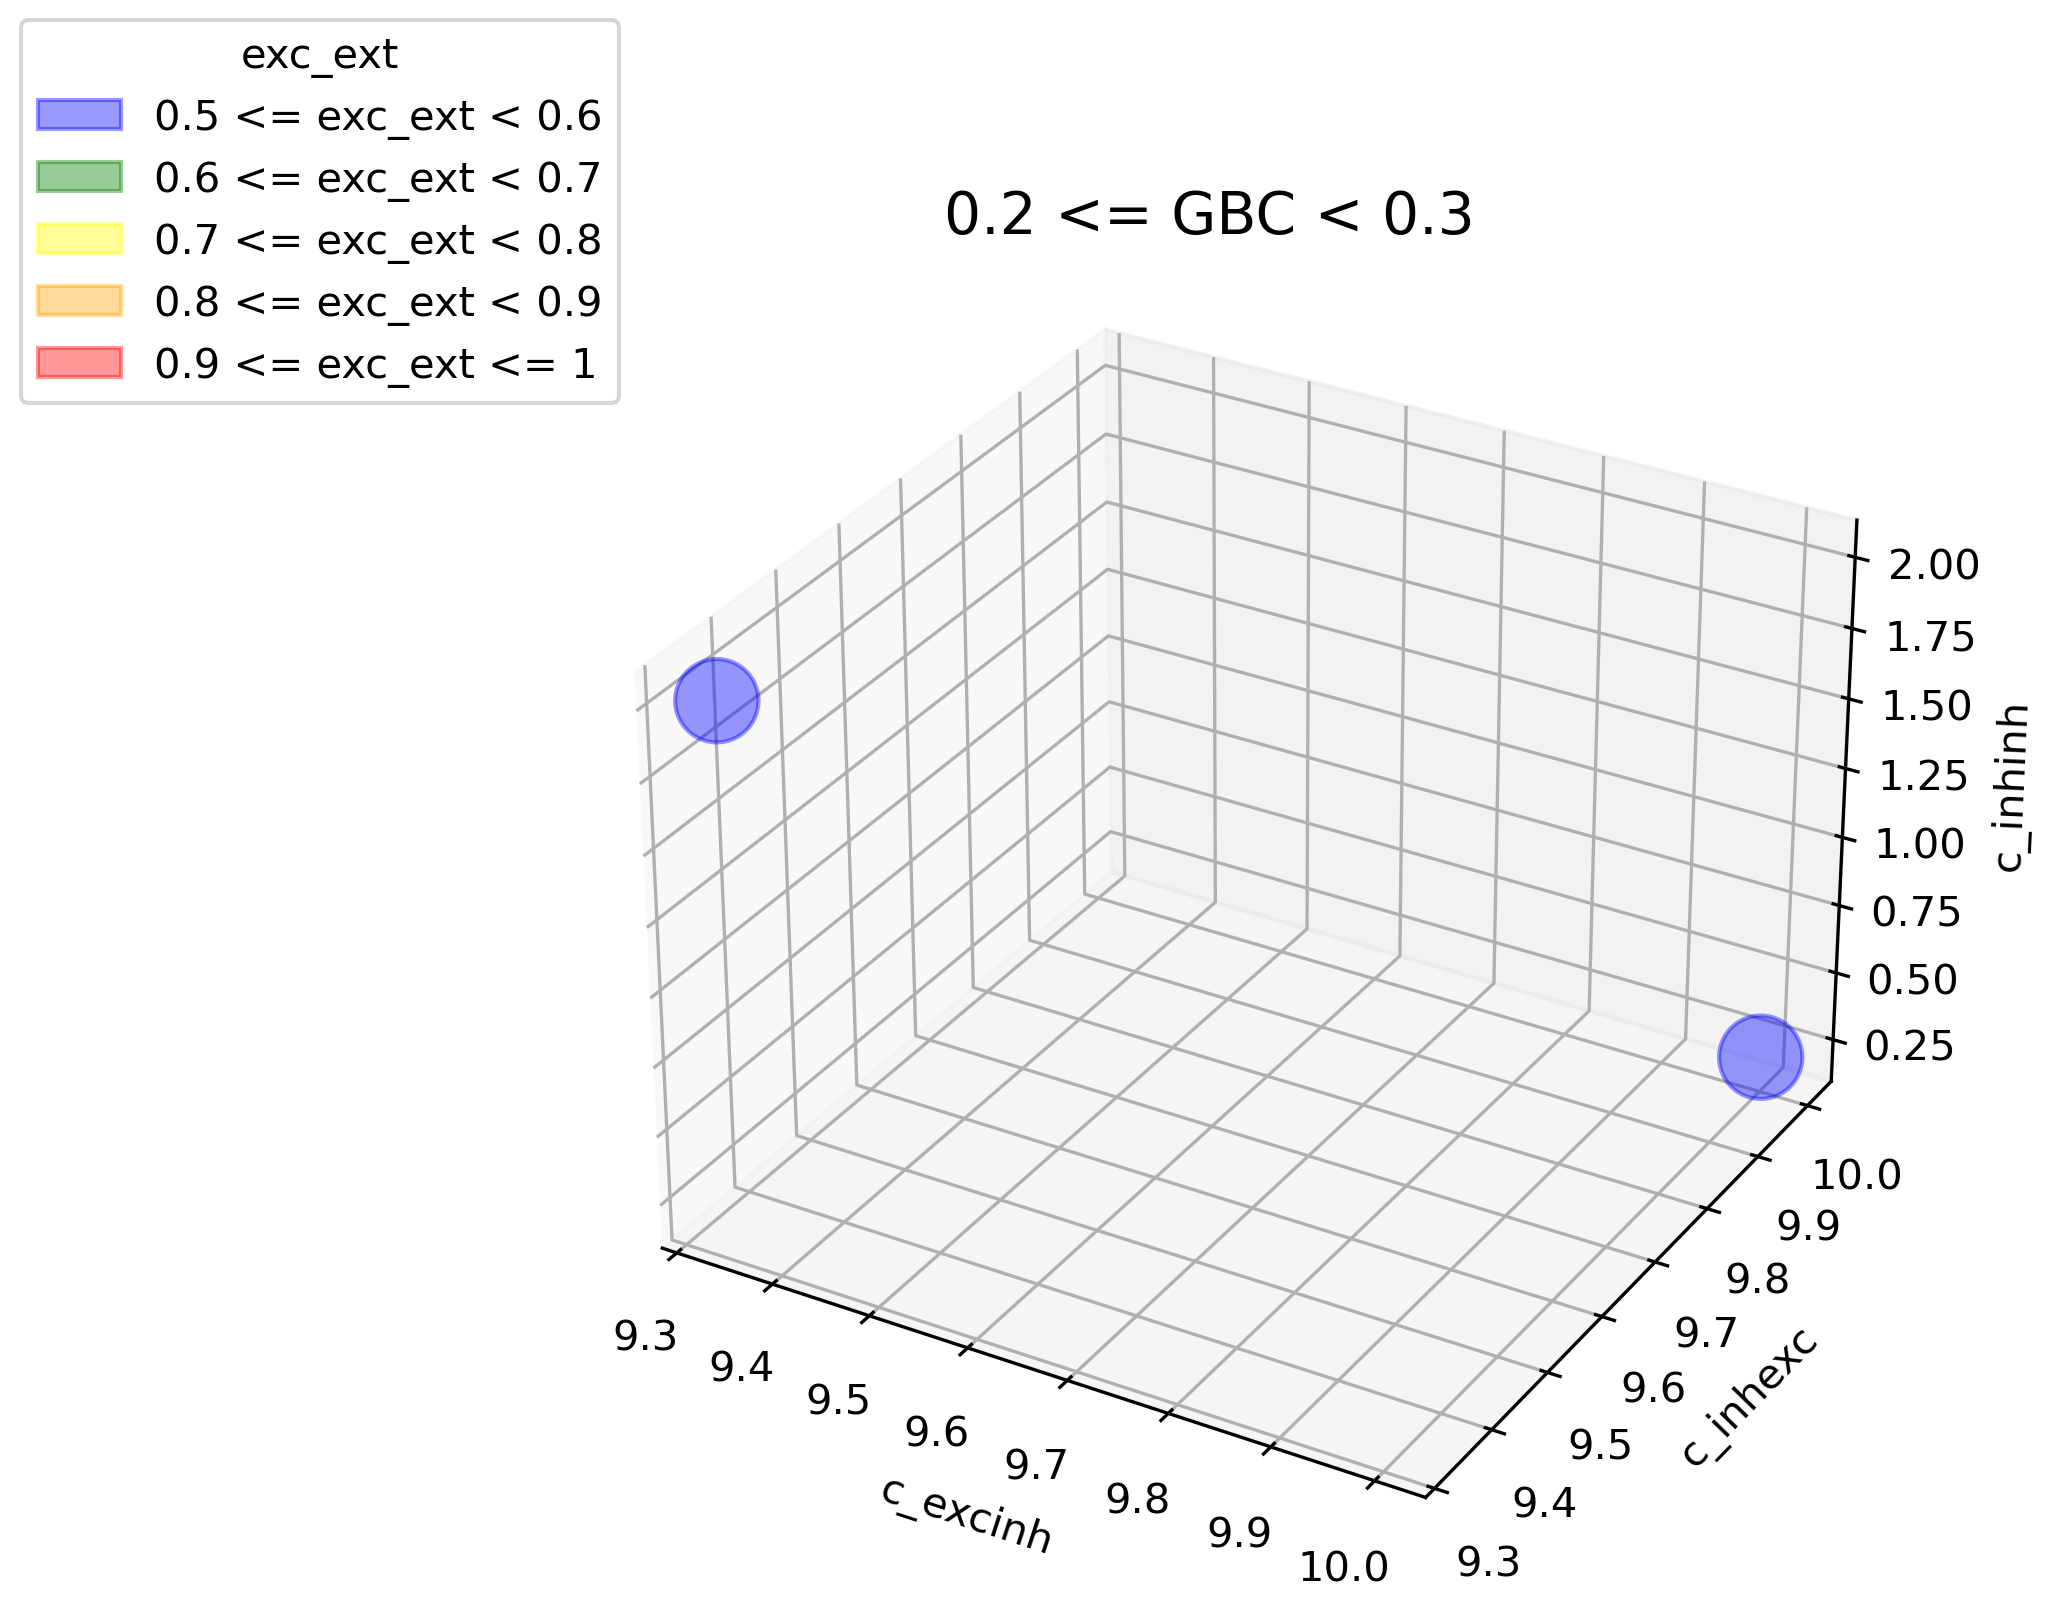

In [68]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('w') 
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('0.2 <= GBC < 0.3', fontsize=14, y= 0.9)

colors = []
for i in range(len(exc_ext_3)):
    if 0.5 <= exc_ext_3[i] and exc_ext_3[i] < 0.6:
        colors.append('blue')
    elif 0.6 <= exc_ext_3[i] and exc_ext_3[i] < 0.7:
        colors.append('green')
    elif 0.7 <= exc_ext_3[i] and exc_ext_3[i] < 0.8:
        colors.append('yellow')
    elif 0.8 <= exc_ext_3[i] and exc_ext_3[i] < 0.9:
        colors.append('orange')
    elif 0.9 <= exc_ext_3[i] and exc_ext_3[i] <= 1:
        colors.append('red')

scatter = ax.scatter(c_excinh_3, c_excinh_3, c_inhinh_3,  c=colors, alpha=0.4, s=400)

ax.set_xlabel('c_excinh')
ax.set_ylabel('c_inhexc')
ax.set_zlabel('c_inhinh')



#legend1 = ax.legend(*scatter.legend_elements()[0],
#                    loc="upper right", title="Classes", labels=colors, bbox_to_anchor=(1.5, 1),prop={'size': 20})
#ax.add_artist(legend1)


# produce a legend with a cross section of sizes from the scatter
#handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
#legend2 = ax.legend(handles, labels, loc="upper right", title="GBC", bbox_to_anchor=(1.5, 0.5), prop={'size': 20})

blue_patch = mpatches.Patch(color='blue', label='0.5 <= exc_ext < 0.6', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='0.6 <= exc_ext < 0.7', alpha=0.4)
yellow_patch = mpatches.Patch(color='yellow', label='0.7 <= exc_ext < 0.8', alpha=0.4)
orange_patch = mpatches.Patch(color='orange', label='0.8 <= exc_ext < 0.9', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='0.9 <= exc_ext <= 1', alpha=0.4)
fig.legend(handles=[blue_patch, green_patch, yellow_patch, orange_patch, red_patch], title = "exc_ext", loc="upper left")
fig.savefig('0.2-0.3.png')

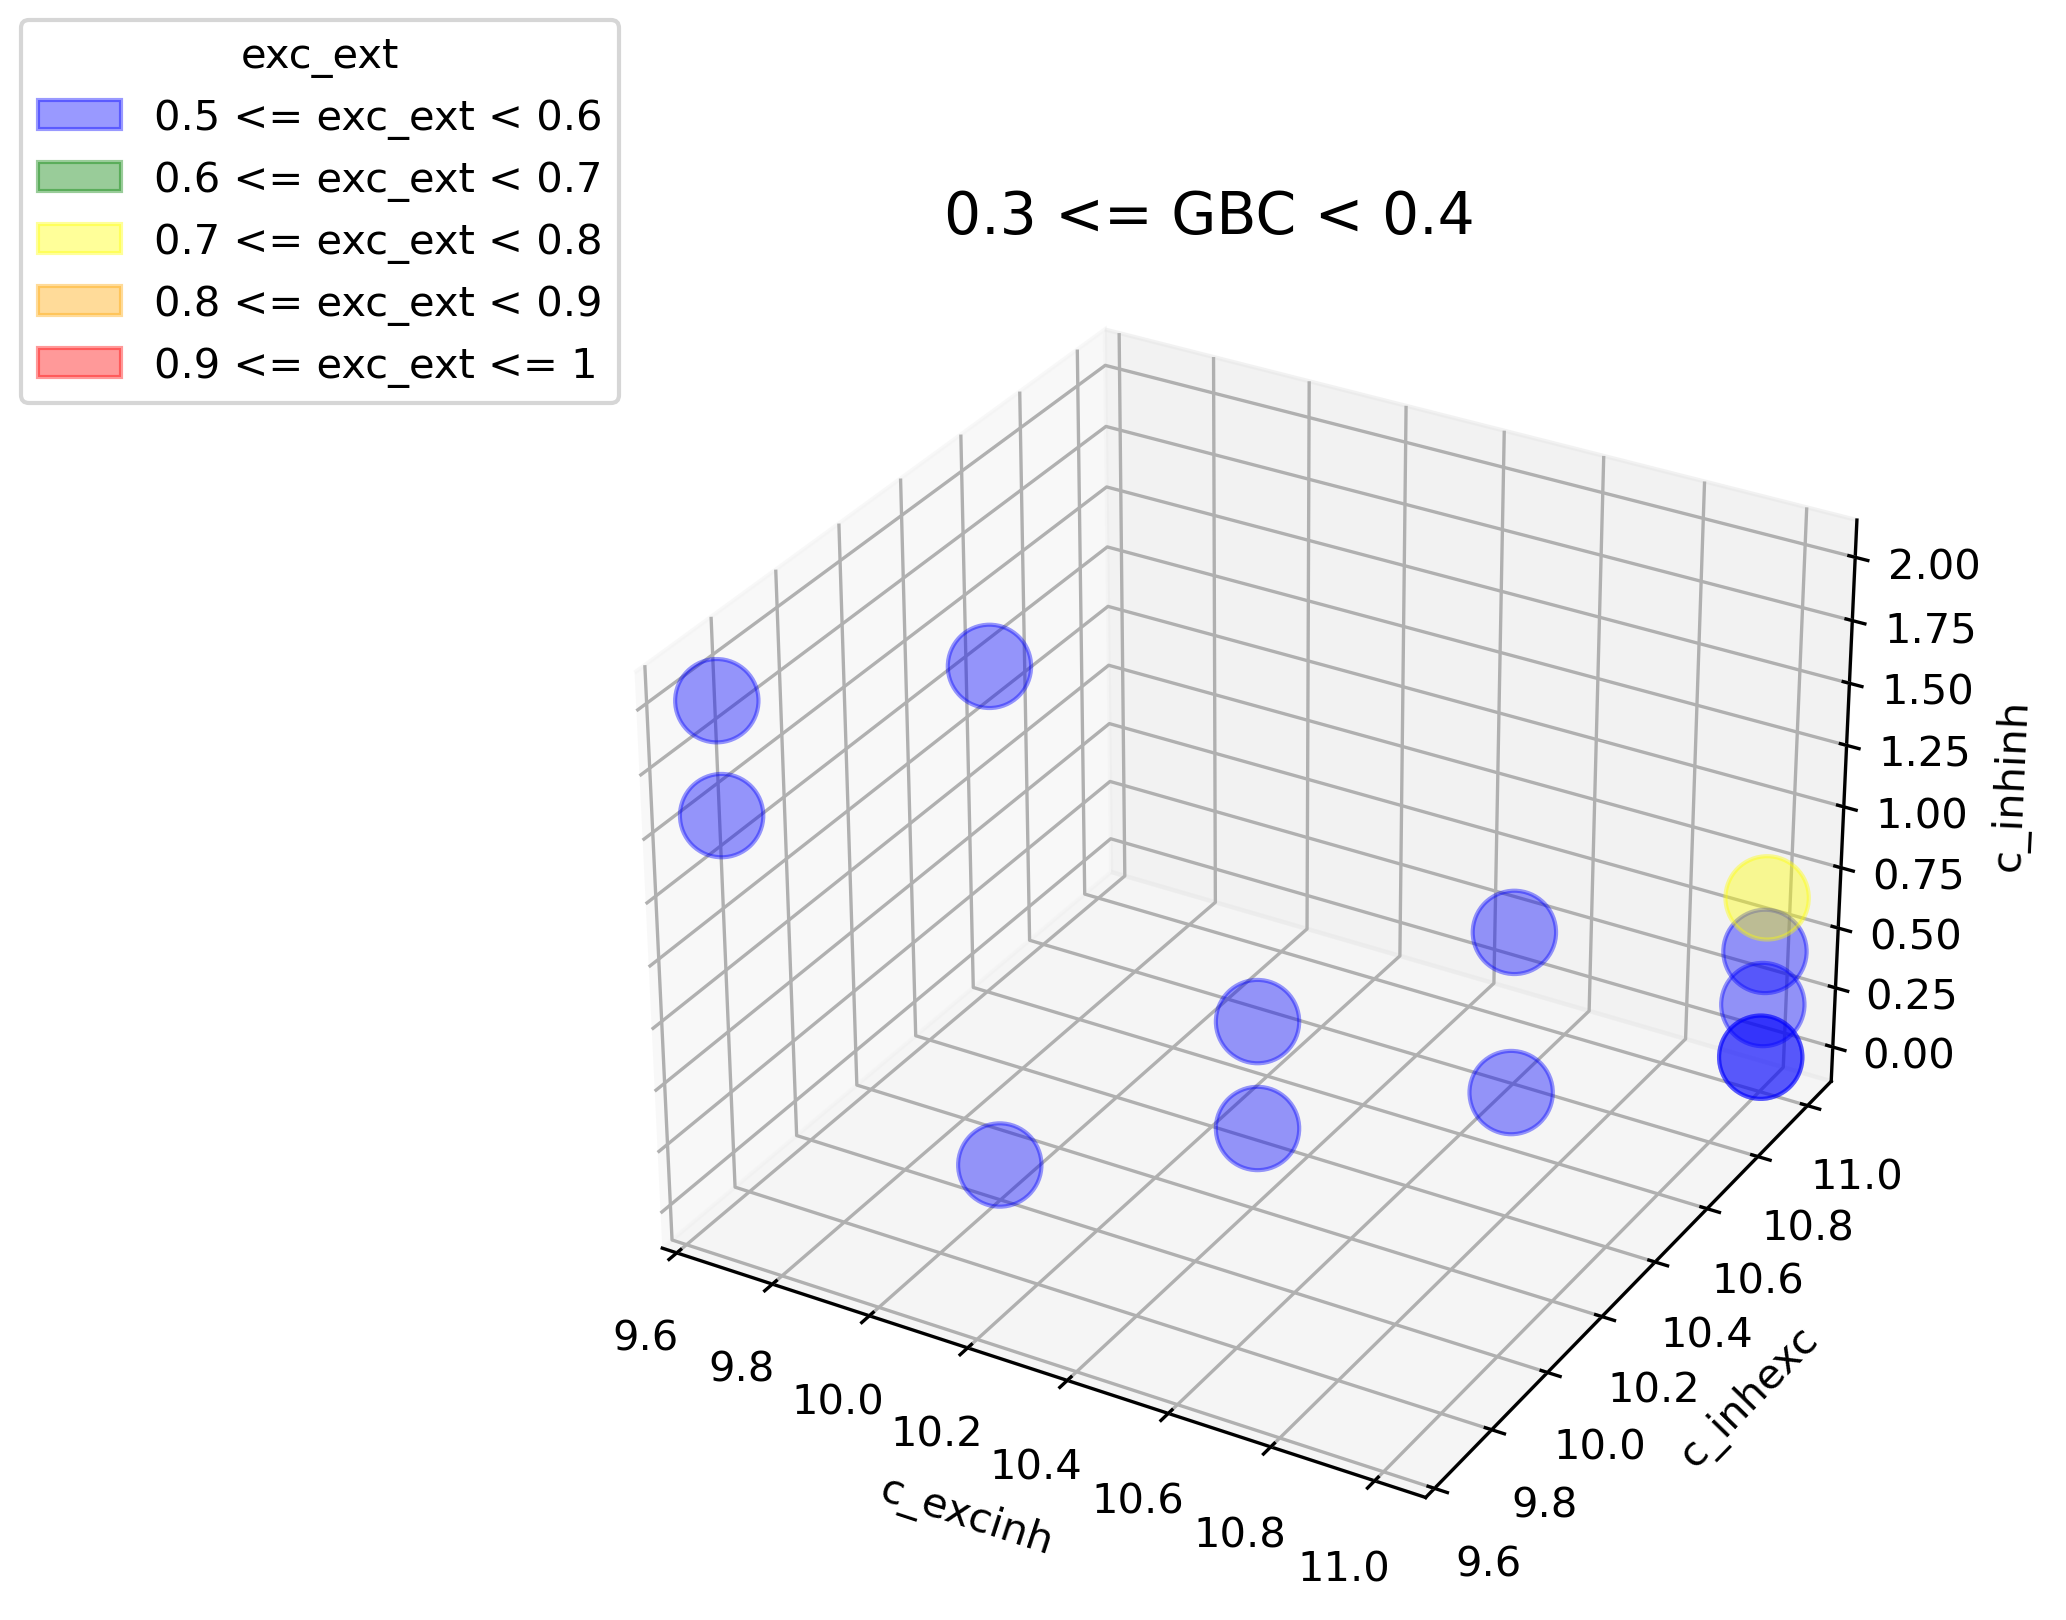

In [69]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('w') 
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('0.3 <= GBC < 0.4', fontsize=14,  y=0.9)

colors = []
for i in range(len(exc_ext_4)):
    if 0.5 <= exc_ext_4[i] and exc_ext_4[i] < 0.6:
        colors.append('blue')
    elif 0.6 <= exc_ext_4[i] and exc_ext_4[i] < 0.7:
        colors.append('green')
    elif 0.7 <= exc_ext_4[i] and exc_ext_4[i] < 0.8:
        colors.append('yellow')
    elif 0.8 <= exc_ext_4[i] and exc_ext_4[i] < 0.9:
        colors.append('orange')
    elif 0.9 <= exc_ext_4[i] and exc_ext_4[i] <= 1:
        colors.append('red')

scatter = ax.scatter(c_excinh_4, c_excinh_4, c_inhinh_4, c=colors, alpha=0.4, s=400)

ax.set_xlabel('c_excinh')
ax.set_ylabel('c_inhexc')
ax.set_zlabel('c_inhinh')


blue_patch = mpatches.Patch(color='blue', label='0.5 <= exc_ext < 0.6', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='0.6 <= exc_ext < 0.7', alpha=0.4)
yellow_patch = mpatches.Patch(color='yellow', label='0.7 <= exc_ext < 0.8', alpha=0.4)
orange_patch = mpatches.Patch(color='orange', label='0.8 <= exc_ext < 0.9', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='0.9 <= exc_ext <= 1', alpha=0.4)
fig.legend(handles=[blue_patch, green_patch, yellow_patch, orange_patch, red_patch], title = "exc_ext", loc="upper left")
fig.savefig('0.3-0.4.png')

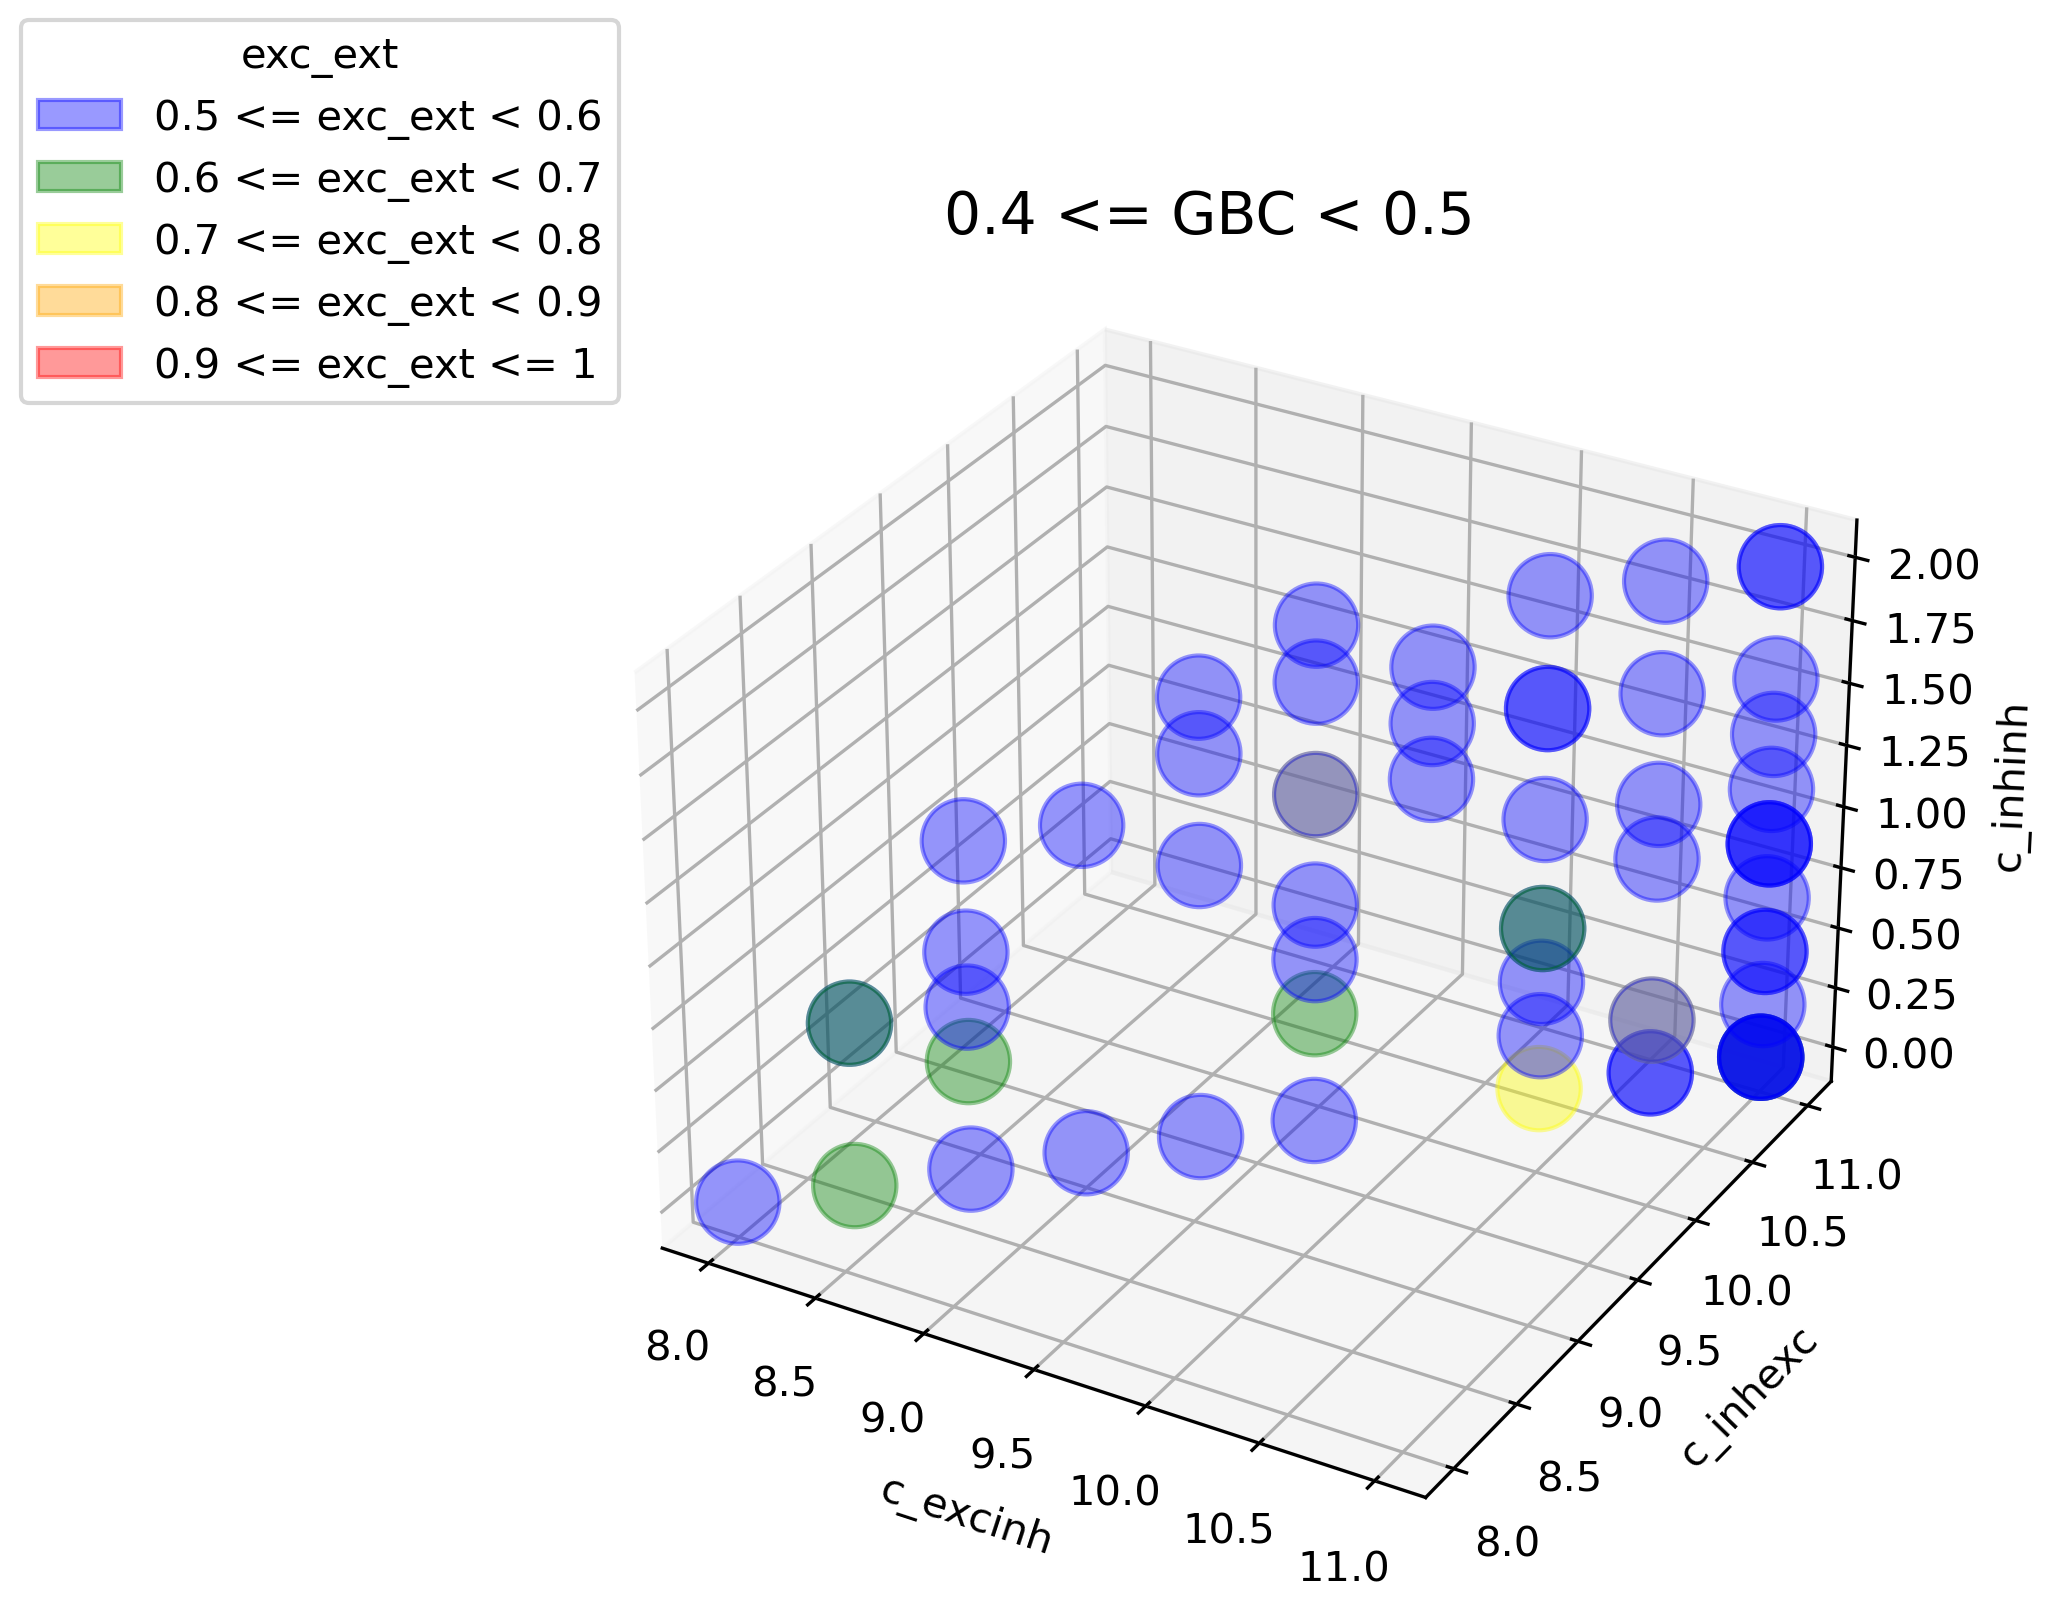

In [70]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
fig.set_facecolor('w') 
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('0.4 <= GBC < 0.5', fontsize=14, y=0.9)


colors = []
for i in range(len(exc_ext_5)):
    if 0.5 <= exc_ext_5[i] and exc_ext_5[i] < 0.6:
        colors.append('blue')
    elif 0.6 <= exc_ext_5[i] and exc_ext_5[i] < 0.7:
        colors.append('green')
    elif 0.7 <= exc_ext_5[i] and exc_ext_5[i] < 0.8:
        colors.append('yellow')
    elif 0.8 <= exc_ext_5[i] and exc_ext_5[i] < 0.9:
        colors.append('orange')
    elif 0.9 <= exc_ext_5[i] and exc_ext_5[i] <= 1:
        colors.app5nd('red')

scatter = ax.scatter(c_excinh_5, c_excinh_5, c_inhinh_5, c=colors, alpha=0.4, s=400)

ax.set_xlabel('c_excinh')
ax.set_ylabel('c_inhexc')
ax.set_zlabel('c_inhinh')


blue_patch = mpatches.Patch(color='blue', label='0.5 <= exc_ext < 0.6', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='0.6 <= exc_ext < 0.7', alpha=0.4)
yellow_patch = mpatches.Patch(color='yellow', label='0.7 <= exc_ext < 0.8', alpha=0.4)
orange_patch = mpatches.Patch(color='orange', label='0.8 <= exc_ext < 0.9', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='0.9 <= exc_ext <= 1', alpha=0.4)
fig.legend(handles=[blue_patch, green_patch, yellow_patch, orange_patch, red_patch], title = "exc_ext", loc="upper left")
fig.savefig('0.4-0.5.png')

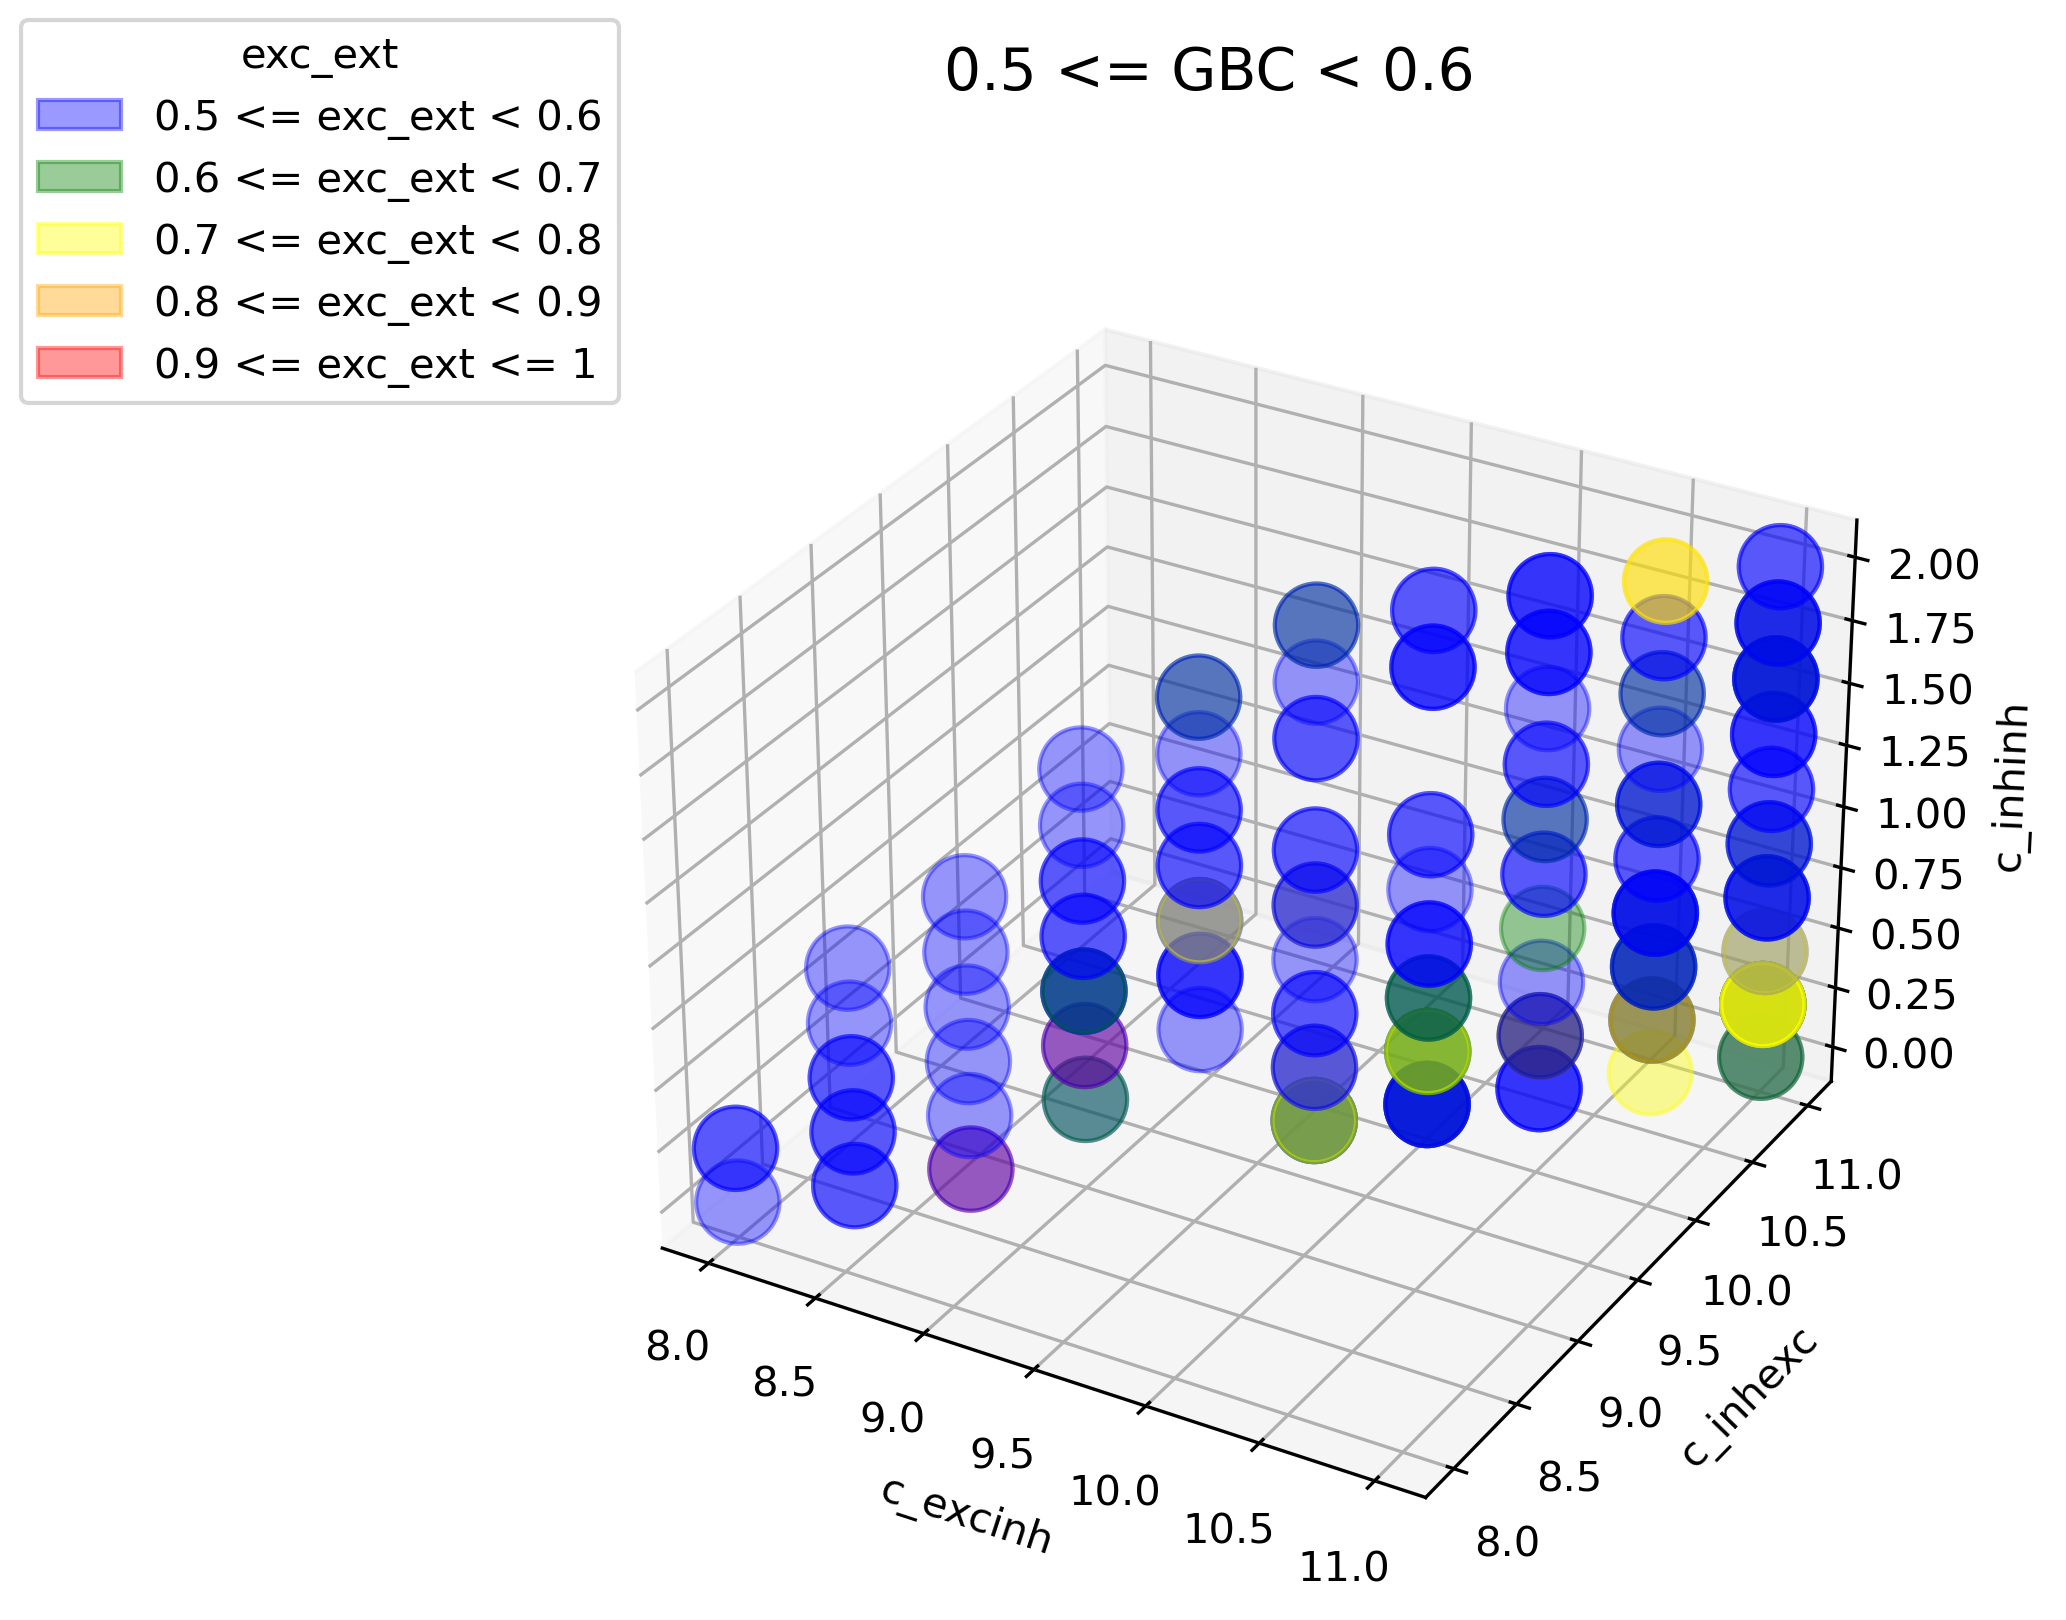

In [71]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('0.5 <= GBC < 0.6', fontsize=14)


colors = []
for i in range(len(exc_ext_6)):
    if 0.5 <= exc_ext_6[i] and exc_ext_6[i] < 0.6:
        colors.append('blue')
    elif 0.6 <= exc_ext_6[i] and exc_ext_6[i] < 0.7:
        colors.append('green')
    elif 0.7 <= exc_ext_6[i] and exc_ext_6[i] < 0.8:
        colors.append('yellow')
    elif 0.8 <= exc_ext_6[i] and exc_ext_6[i] < 0.9:
        colors.append('orange')
    elif 0.9 <= exc_ext_6[i] and exc_ext_6[i] <= 1:
        colors.append('red')

scatter = ax.scatter(c_excinh_6, c_excinh_6, c_inhinh_6, c=colors, alpha=0.4, s=400)

ax.set_xlabel('c_excinh')
ax.set_ylabel('c_inhexc')
ax.set_zlabel('c_inhinh')


blue_patch = mpatches.Patch(color='blue', label='0.5 <= exc_ext < 0.6', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='0.6 <= exc_ext < 0.7', alpha=0.4)
yellow_patch = mpatches.Patch(color='yellow', label='0.7 <= exc_ext < 0.8', alpha=0.4)
orange_patch = mpatches.Patch(color='orange', label='0.8 <= exc_ext < 0.9', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='0.9 <= exc_ext <= 1', alpha=0.4)
fig.legend(handles=[blue_patch, green_patch, yellow_patch, orange_patch, red_patch], title = "exc_ext", loc="upper left")
fig.savefig('0.5-0.6.png')

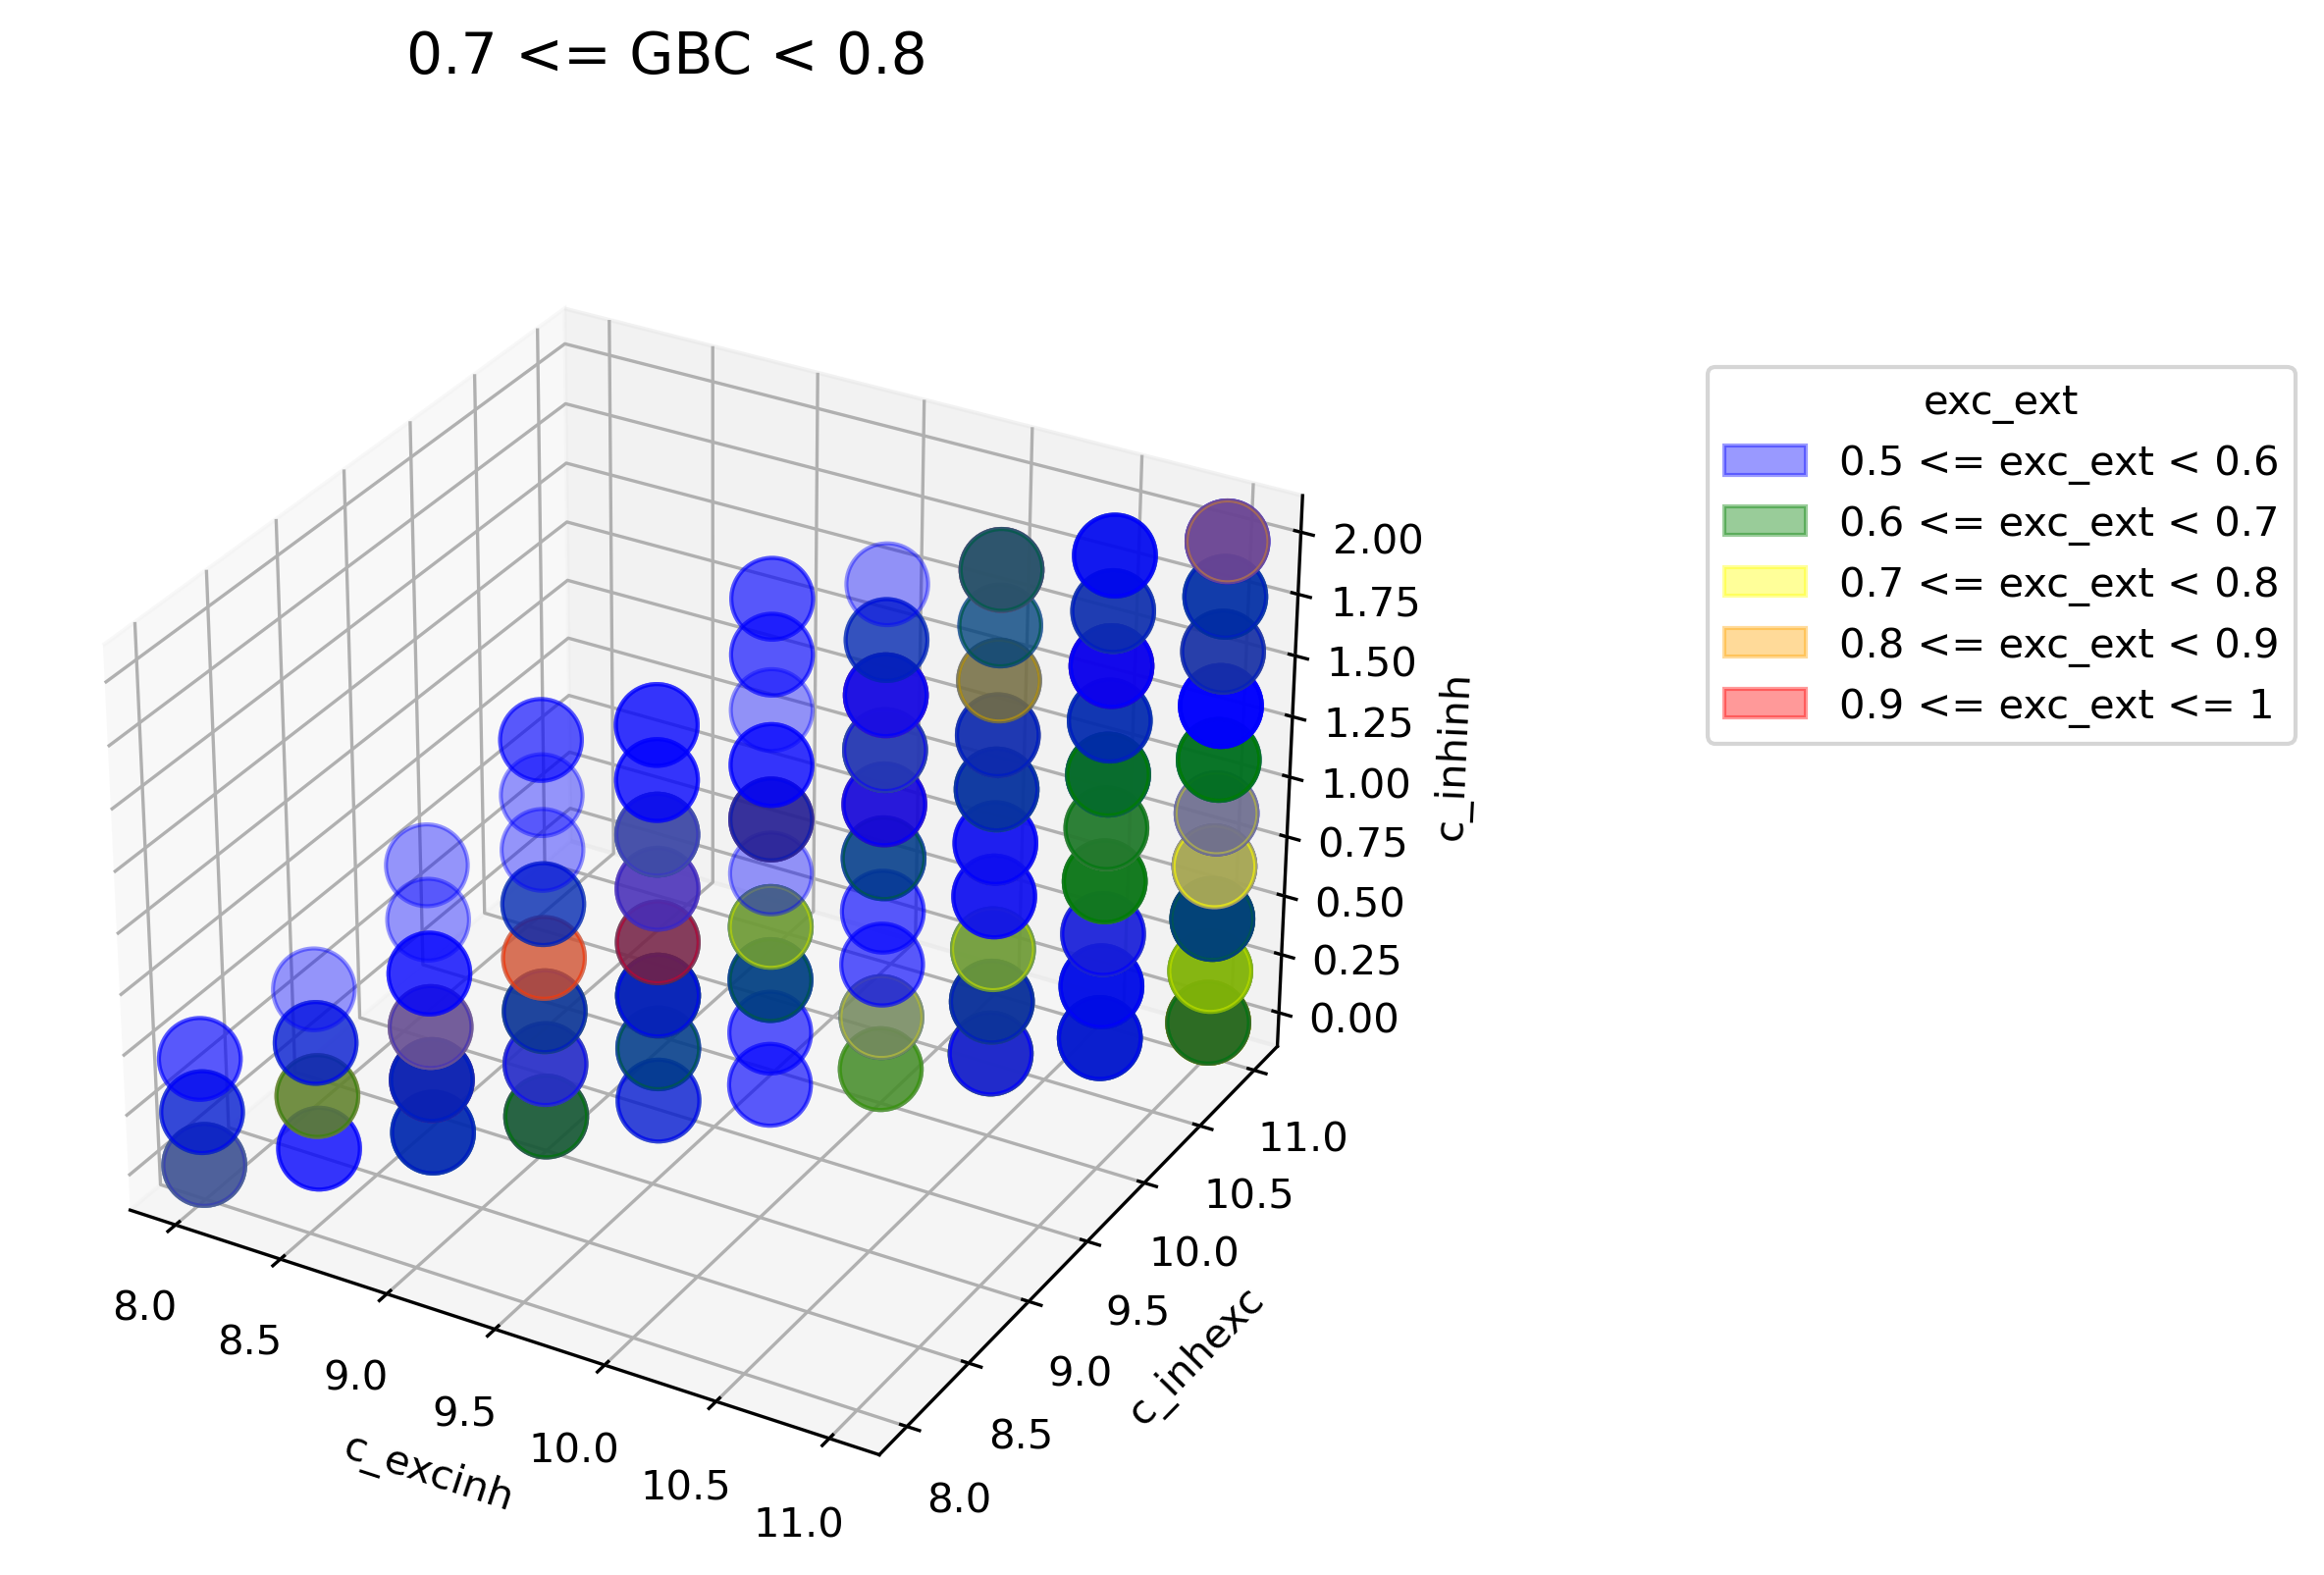

In [65]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('0.7 <= GBC < 0.8', fontsize=14)


colors = []
for i in range(len(exc_ext_7)):
    if 0.5 <= exc_ext_7[i] and exc_ext_7[i] < 0.6:
        colors.append('blue')
    elif 0.6 <= exc_ext_7[i] and exc_ext_7[i] < 0.7:
        colors.append('green')
    elif 0.7 <= exc_ext_7[i] and exc_ext_7[i] < 0.8:
        colors.append('yellow')
    elif 0.8 <= exc_ext_7[i] and exc_ext_7[i] < 0.9:
        colors.append('orange')
    elif 0.9 <= exc_ext_7[i] and exc_ext_7[i] <= 1:
        colors.append('red')

scatter = ax.scatter(c_excinh_7, c_excinh_7, c_inhinh_7,  c=colors, alpha=0.4, s=400)

ax.set_xlabel('c_excinh')
ax.set_ylabel('c_inhexc')
ax.set_zlabel('c_inhinh')


blue_patch = mpatches.Patch(color='blue', label='0.5 <= exc_ext < 0.6', alpha=0.4)
green_patch = mpatches.Patch(color='green', label='0.6 <= exc_ext < 0.7', alpha=0.4)
yellow_patch = mpatches.Patch(color='yellow', label='0.7 <= exc_ext < 0.8', alpha=0.4)
orange_patch = mpatches.Patch(color='orange', label='0.8 <= exc_ext < 0.9', alpha=0.4)
red_patch = mpatches.Patch(color='red', label='0.9 <= exc_ext <= 1', alpha=0.4)
fig.legend(handles=[blue_patch, green_patch, yellow_patch, orange_patch, red_patch], title = "exc_ext", loc="upper right", bbox_to_anchor=(1.2, 0.8))
fig.savefig('0.6.png')

In [4]:
# option to plot
'''
import pandas as pd
import plotly
import plotly.graph_objs as go


#Read cars data from csv
#data = pd.read_csv("cars.csv")

#Set marker properties
markersize = [326/12, 308/12, 304/12, 209/12, 258/12]
markercolor = [13,14,14,15,15]

#Make Plotly figure
fig1 = go.Scatter3d(x=[3950, 3900, 3715, 3505, 4066],
                    y=[261, 151, 184, 184, 172],
                    z=[36000, 35550, 40960, 32000, 34184],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Reds'),
                    line=dict (width=0.02),
                    mode='markers')


#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="curb-weight"),
                                yaxis=dict( title="horsepower"),
                                zaxis=dict(title="price")), showlegend=True)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))
'''

'5D Plot.html'

In [22]:
print(exc_ext)
print(c_excinh)
print(c_inhexc)
print(c_inhinh)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


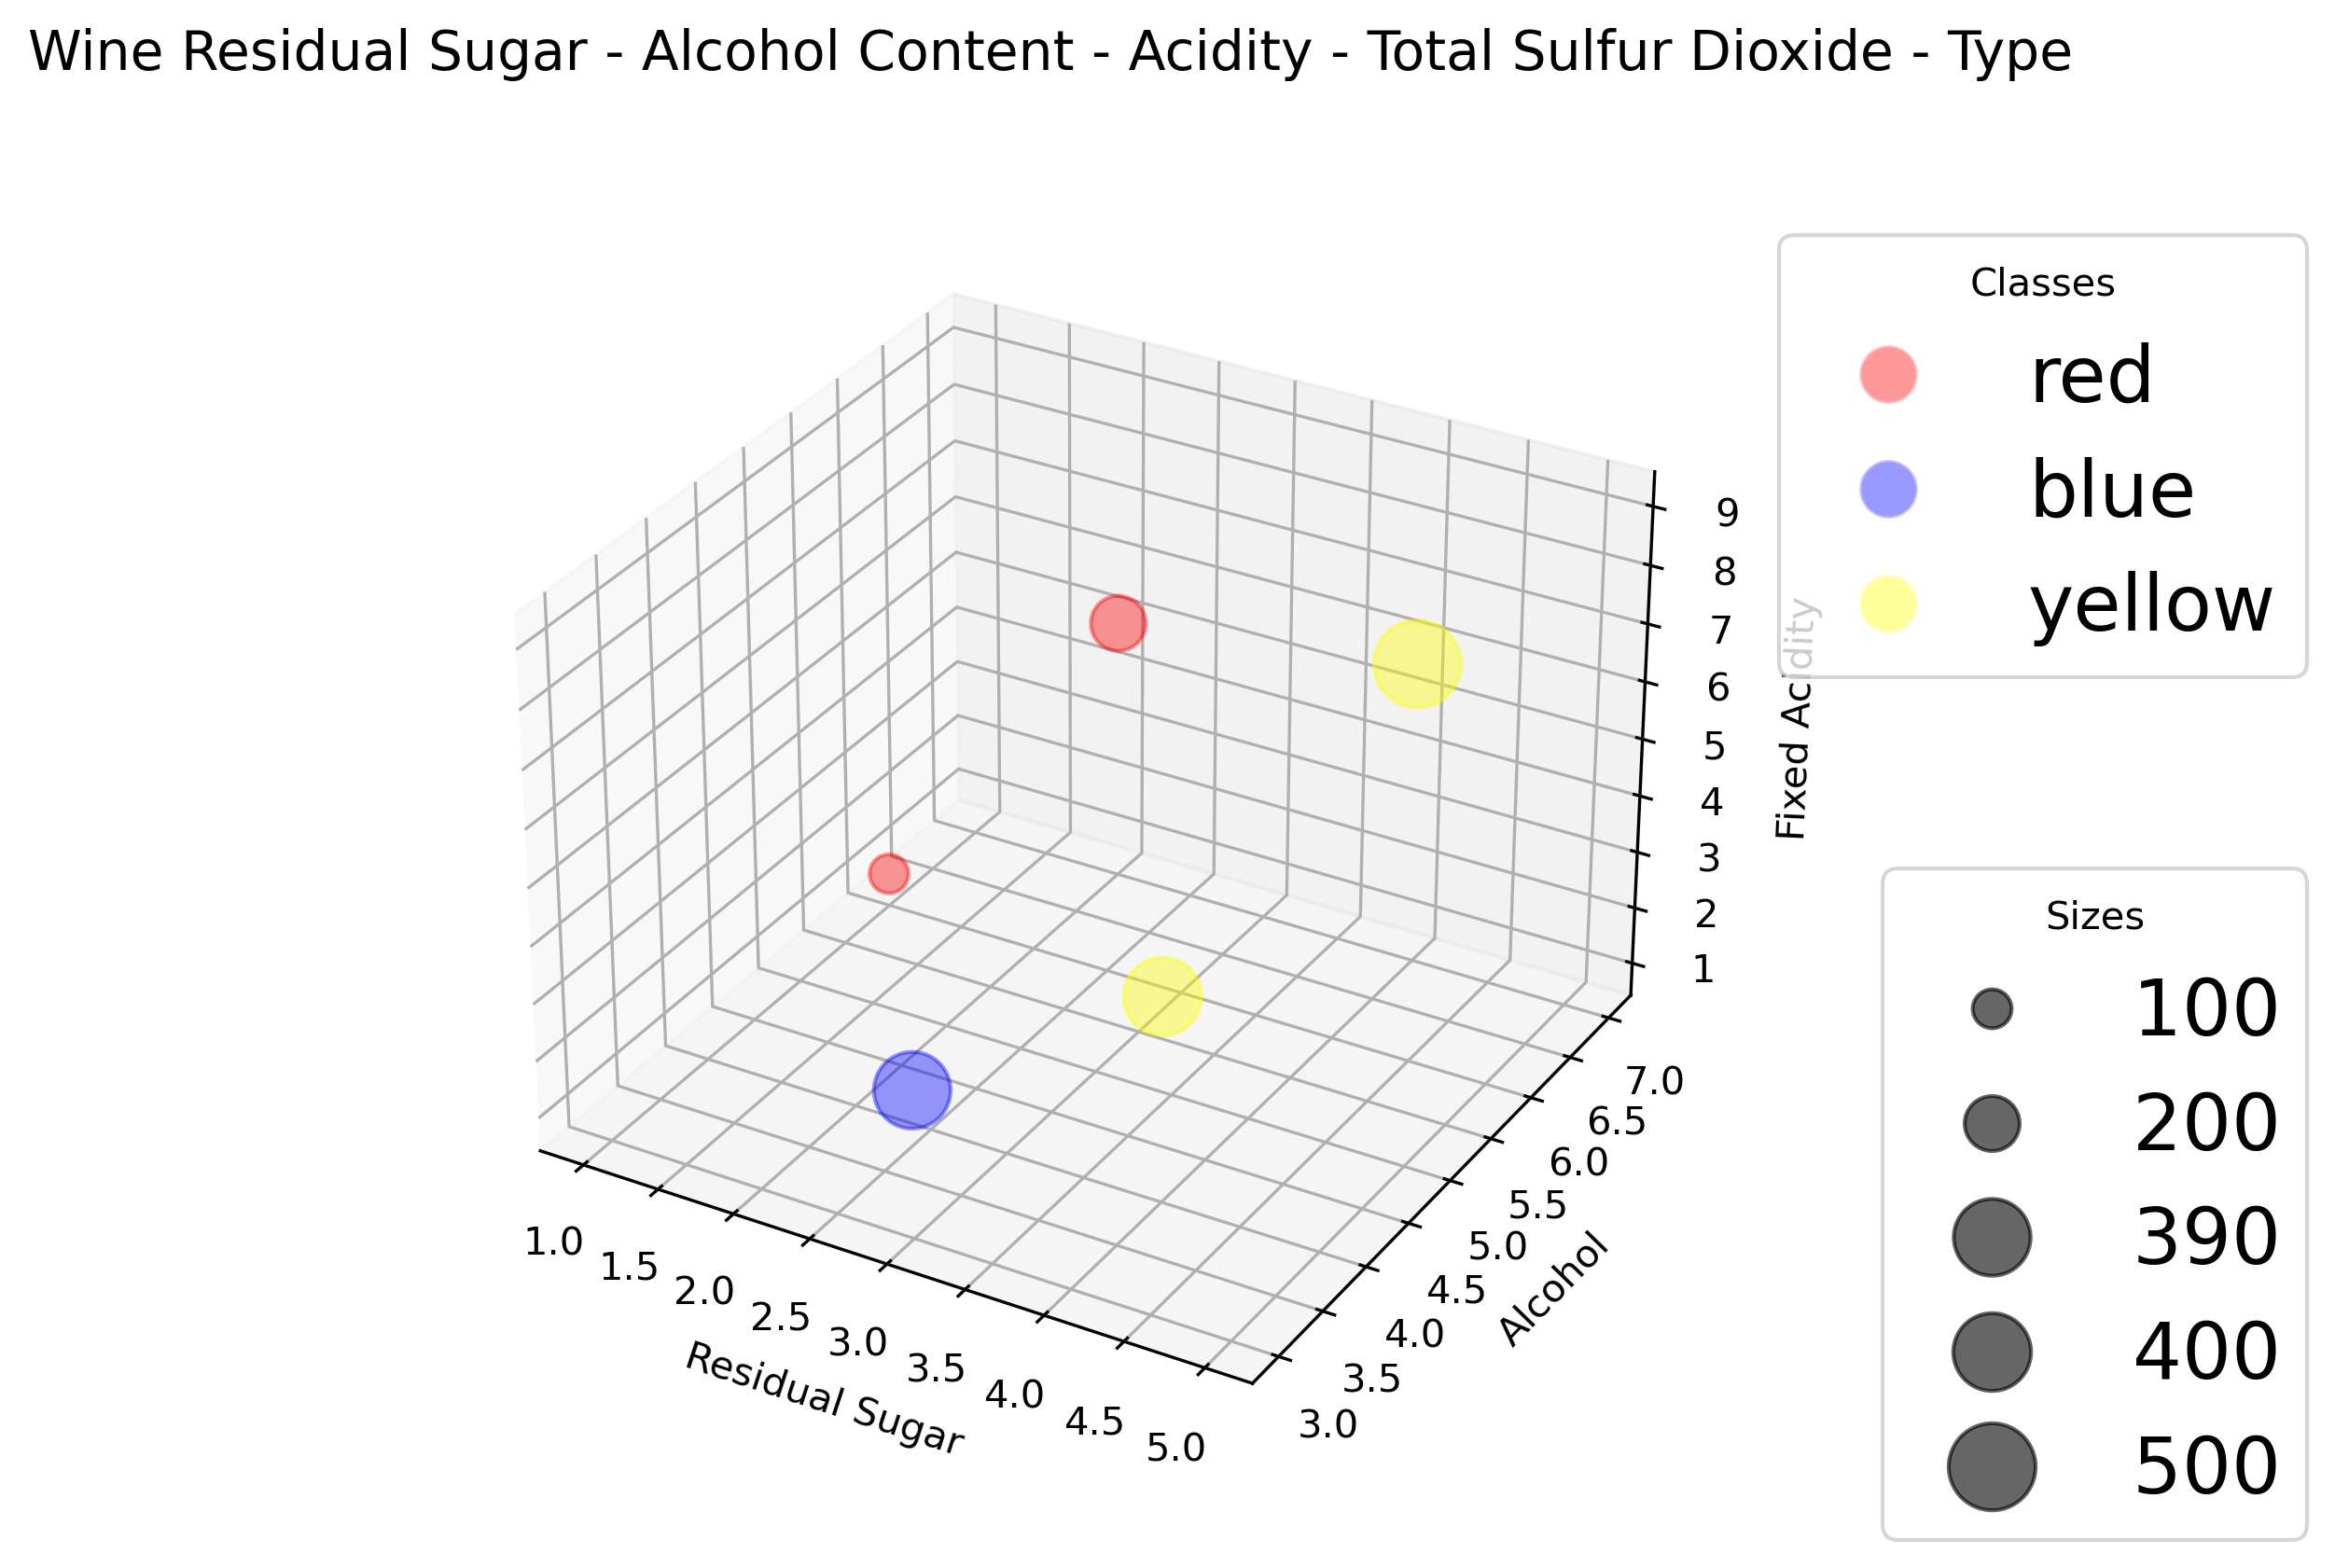

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.lines import Line2D

# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = [1,2,3,5,4]
ys = [6,7,3,5,4]
zs = [1,5,3,9,4]
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = [100,200,390,500,400]
colors = ['red','red','blue','yellow','yellow']

scatter = ax.scatter(xs, ys, zs, alpha=0.4, c=colors, s=ss)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

# Create additional legend
UniqueColors = list(dict.fromkeys(colors))
Legend2Add = []
for color in UniqueColors:
    Legend2Add.append( Line2D([0], [0], marker='o', color='w', label=color,
           markerfacecolor=color, markersize=15, alpha=0.4) )

# Produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend1 = ax.legend(handles,
                    loc="upper right", title="Classes", handles=Legend2Add, bbox_to_anchor=(1.5, 1),prop={'size': 20})
ax.add_artist(legend1)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", bbox_to_anchor=(1.5, 0.5), prop={'size': 20})

plt.show()